## Time dependent partial differential equations
In this notebook, we begin solving time dependent equations. It's a small step up from the previous notebook in the sense that the differential operator for the second derivative is still there. However, there is a pretty big step in terms of how time is accounted for in the functions. We will opt for an *implicit* scheme. Effectively answering the question of *what happens next?* with *what happens next depends on...what happens next*. Alarming at first, but ultimately a good thing!

### Heat transfer
To test our newly gained understanding of representing differential operators as matrices and solving PDEs with the finite difference method, let us try a new equation - the time dependent diffusion equation. This is often thought of as a heat transfer problem, but the same form of equation represents ground water flow, chemical diffusion, elastic displacement, and electric fields. 

#### The equation
The heat transfer equation is expressed in terms of the temperature, $T$.

$\rho c_p \frac{\partial T}{\partial t} - \frac{\partial}{\partial x} k \frac{\partial T}{\partial x} = S(x,t)$.

where $\rho$ is the material density, $c_p$ is the heat capacity, $k$ the thermal conductivity, and $S(x,t)$ a source of heat. 

For the first time, we are looking at a true partial differential equation. Temperature is a function of both space, $x$, and time, $t$. We'll write that two ways, as $T(x,t)$, and later when working with a grid as $T_x^t$. Hence, the $\partial$ is a special symbol telling the reader that this derivative is found by holding all variables except the one used to differentiate constant. A common mistake is to use $\textrm{d}$ for derivatives when you mean $\partial$, or vice-versa. Be careful!

The origin of this equation can be understood by considering a 'control volume' or in this case a 'control line' -an infinitesimal portion of the domain, represented by $\textrm{d}x$. Heat flows in as $Q(x)$, heat flows out a $Q(x+dx)$. The difference results in the time rate of change in temperature. A source can be added for completeness. We worked through this on the board, in class.

#### Finite difference approximation
The equation is 'descretized' by representing the derivatives as finite difference approximations. The first derivative on time is written

$\frac{\partial T}{\partial t} \approx \frac{T(x,t+\Delta t) - T(x,t)}{\Delta t}$

and, the second derivative found by twice taking the centered difference:

$\frac{\partial^2T}{\partial x^2} \approx \frac{\partial}{\partial x}\left(\frac{T(x+\Delta x,t) - T(x-\Delta x,t)}{2\Delta x}\right) = \frac{1}{2\Delta x}\left(\frac{\partial T(x+\Delta x,t) }{\partial x} - \frac{\partial T(x-\Delta x,t) }{\partial x}\right)$

$=\frac{1}{2\Delta x}\left(\frac{T(x,t)-T(x+2\Delta x,t) - T(x-2\Delta x,t) + T(x,t)}{2\Delta x}\right) = \frac{T(x-\Delta x,t) -2T(x,t) + T(x+\Delta x,t)}{\Delta x^2}$

With the derivatives approximated with finite differences, the PDE equation can be written

$\frac{T(x,t+\Delta t) - T(x,t)}{\Delta t} - \kappa \frac{T(x-\Delta x,t) -2T(x,t) + T(x+\Delta x,t)}{\Delta x^2} = \frac{S(x,t)}{\rho c_p}$

Where I have introduced $\kappa = \frac{k}{\rho c_p}$, the thermal diffusivity.

#### System of linear equations####
All those parentheses make it cumbersome. Let's clean up the notation by observing the we are doing physics on a grid. One grid is for space, and the $i^{\textrm{th}}$ point on that grid will be given by $i \Delta x$. The other grid is in time and the $j^{\textrm{th}}$ point on that grid will be given by $j \Delta t$. Bot $i$ and $j$ begin at zero. If we write $T(x,t) = T_i^j$, the equation becomes

$\frac{T_i^{j+1} - T_i^j}{\Delta t} - \kappa \frac{T_{i-1}^j - 2T_i^j + T_{i+1}^j}{\Delta x^2} = \frac{S_i^j}{\rho c_p}$

Now, for something different. The obvious way to do this was to write all the times on $T$ in the second derivative operator as $T^j$, or at time $t$. This is called an *explicit* method. But, it turns out that we can write them as $T^{j+1}$, or time $t+\Delta t$ and move things around to create a valid linear system to solve. This is called *implicit* time stepping. It is beyond the scope of these notes, but implicit methods are more stable than explicit ones. This means that we'll be justified in taking a much larger $\Delta t$ when we solve the system numerically. Good! The new system is

$\frac{T_i^{j+1} - T_i^j}{\Delta t} - \kappa \frac{T_{i-1}^{j+1} - 2T_i^{j+1} + T_{i+1}^{j+1}}{\Delta x^2} = \frac{S_i^j}{\rho c_p}$

This expression can be rearranged algebraically to give.

$T_i^{j+1} - \frac{\kappa \Delta t}{\Delta x^2}\left( T_{i-1}^{j+1} - 2T_i^{j+1} + T_{i+1}^{j+1}\right) = \Delta t \frac{S_i^j}{\rho c_p} + T_i^j$

Recalling the previous lesson, we had

$\mathbf{A} = 
\begin{bmatrix}
    -2 &  1 &   &  & \\
    1  & -2 & 1 &  & \\
    \ddots& \ddots&\ddots &\ddots &\ddots      \\
     &   &  1 & -2 & 1 \\
     &  & & 1 & -2
\end{bmatrix} 
$

It will also be useful to recall that the identity matrix is

$
\mathbf{I} = 
\begin{bmatrix}
    1 &  &   &  & \\
      & 1&  &  & \\
    \ddots& \ddots&\ddots &\ddots &\ddots      \\
     &   &   & 1&  \\
     &  & &  & 1
\end{bmatrix} 
$

These two matrix operators allow us to write

$\left(\mathbf{I} + \frac{\kappa \Delta t}{\Delta x^2} \mathbf{A}\right)\mathbf{T}^{j+1} = \Delta t \frac{\mathbf{S}^j}{\rho c_p} + \mathbf{T}^j$

where $i$ subscript have been dropped and bold introduced to indicate $\mathbf{T^{j}}$,$\mathbf{T^{j+1}}$, and $\mathbf{S^{j}}$ N x 1 column vectors of *all* temperatures or source values. To be clear, the linear system that is solved is

$\mathbf{A'}\mathbf{T}^{j+1} = \mathbf{b}$

where 

$\mathbf{A'} = \mathbf{I} + \frac{\kappa \Delta t}{\Delta x^2} \mathbf{A}$

and 

$\mathbf{b} = \Delta t \frac{\mathbf{S}^j}{\rho c_p} + \mathbf{T}^j$


#### A word on boundary conditions

In the previous unit, you accounted for the boundary by adding contributions to the right hand side, and solving only for the interior points. The boundaries were reintroduced at the end of the calculation with the insert command. 

If you like that, do it. However, a more common approach is to have all degrees of freedom, including the boundary points, in one equation. This can be done by making the first row in the matrix be (in Python)

$\mathbf{A'}\textrm{[0,:] = [1,0,...0,0]}$

and the last row

$\mathbf{A'}\textrm{[-1,:] = [0,0,...0,1]}$

correspondingly, the $\mathbf{b}$ has to be changed so that

$\mathbf{b}\textrm{[0] =} T(x=0,t+\Delta t)$

and

$\mathbf{b}\textrm{[-1] =} T(x=L,t+\Delta t)$

Where we assume the domain is from 0 to $L$. This makes the linear equations corresponding to the first and last row read

$T_0^{j+1} = T(x=0,t+\Delta t)$

and

$T_{N-1}^{j+1} = T(x=L,t+\Delta t)$

### Exercise
Using the above and your knowledge from the previous assignment solve the 1-D heat equation with

$T(x,t=0) = 0$

$\kappa = 0.01$

$\Delta t = 1$

$0<t<=10$

$T(x=0,t) = 0$

$T(x=1,t) = 1$

$S(x,t) = \begin{cases}
(1+x)^2 & .4 \le x \le .6\\
0       & \textrm{elsewhere}
\end{cases}$

experiment with the mesh, or $\Delta x$ to get a result consistent with mine.


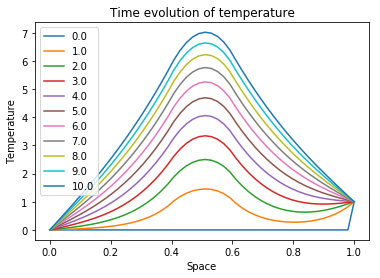